In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ford

###### ours

In [3]:
csvdir = 'comparison_gpcc_sparse/ours_lossy_ford_data90.csv'
df = pd.read_csv(csvdir).mean()

In [4]:
num_rates = 8
bpp_ours = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)])[::-1]
d1_ours = np.array([df['R'+str(idx)+'_mseF,PSNR (p2point)'] for idx in range(num_rates)])[::-1]
d2_ours = np.array([df['R'+str(idx)+'_mseF,PSNR (p2plane)'] for idx in range(num_rates)])[::-1]
enc_time_ours = [df['R'+str(idx)+'_enc_time'] for idx in range(num_rates)][::-1]
dec_time_ours = [df['R'+str(idx)+'_dec_time'] for idx in range(num_rates)][::-1]
# print(bpp_ours, '\n', d1_ours, '\n', d2_ours)
print('\n', np.round(bpp_ours,3), 
      '\n', np.round(d1_ours, 2), 
      '\n', np.round(d2_ours, 2),
     '\n', np.round(enc_time_ours, 2),
     '\n', np.round(dec_time_ours, 2))
print(np.array(enc_time_ours).mean().round(2))
print(np.array(dec_time_ours).mean().round(2))


 [ 0.516  1.127  2.296  4.198  6.683  9.4   12.288 15.226] 
 [46.14 52.17 58.19 64.21 70.14 75.92 81.71 87.22] 
 [50.77 56.86 62.93 68.98 74.91 80.69 86.47 91.99] 
 [0.89 1.03 1.17 1.42 1.67 1.93 2.24 2.46] 
 [0.61 0.77 0.97 1.19 1.42 1.65 1.87 2.09]
1.6
1.32


In [6]:
csvdir = 'comparison_gpcc_sparse/ours_lossy_offset_ford_data90.csv'
df = pd.read_csv(csvdir).mean()

In [7]:
num_rates = 8
bpp_offset = np.array([df['R'+str(idx)+'_bpp'] \
                     for idx in range(num_rates)])[::-1]
d1_offset = np.array([df['R'+str(idx)+'_mseF,PSNR (p2point)'] \
                    for idx in range(num_rates)])[::-1]
d2_offset = np.array([df['R'+str(idx)+'_mseF,PSNR (p2plane)'] \
                    for idx in range(num_rates)])[::-1]
enc_time_offset = [df['R'+str(idx)+'_enc_time'] for idx in range(num_rates)][::-1]
dec_time_offset = [df['R'+str(idx)+'_dec_time'] for idx in range(num_rates)][::-1]
# print(bpp_ours, '\n', d1_ours, '\n', d2_ours)
print('\n', np.round(bpp_offset, 3), 
      '\n', np.round(d1_offset, 2), 
      '\n', np.round(d2_offset, 2),
     '\n', np.round(enc_time_offset, 2),
     '\n', np.round(dec_time_offset, 2))
print(np.array(enc_time_offset).mean().round(2))
print(np.array(dec_time_offset).mean().round(2))


 [ 0.516  1.127  2.296  4.198  6.683  9.4   12.288 15.226] 
 [47.61 53.66 59.49 65.27 70.73 76.06 81.73 87.24] 
 [53.87 59.76 65.19 70.6  75.73 80.91 86.49 92.  ] 
 [0.99 1.08 1.27 1.5  1.73 2.07 2.57 2.59] 
 [0.63 0.79 0.98 1.18 1.39 1.62 1.84 2.06]
1.72
1.31


###### G-PCC

In [9]:
csvdir = 'comparison_gpcc_sparse/gpcc_lossy_ford_data90.csv'
df = pd.read_csv(csvdir).mean()

In [10]:
num_rates = 10
bpp_gpcc = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)])[2:][::-1]
d1_gpcc = np.array([df['R'+str(idx)+'_mseF,PSNR (p2point)'] for idx in range(num_rates)])[2:][::-1]
d2_gpcc = np.array([df['R'+str(idx)+'_mseF,PSNR (p2plane)'] for idx in range(num_rates)])[2:][::-1]
enc_time_gpcc = [df['R'+str(idx)+'_enc_time_wall'] 
                 for idx in range(num_rates)][2:][::-1]
dec_time_gpcc = [df['R'+str(idx)+'_dec_time_wall'] 
                 for idx in range(num_rates)][2:][::-1]
print('\nbpp_gpcc',np.round(bpp_gpcc, 2), 
      '\nd1_gpcc', np.round(d1_gpcc, 2), 
      '\nd2_gpcc', np.round(d2_gpcc, 2),
     '\nenc_time_gpcc', np.round(enc_time_gpcc, 2),
     '\ndec_time_gpcc', np.round(dec_time_gpcc, 2))
print(np.array(enc_time_gpcc).mean().round(2))
print(np.array(dec_time_gpcc).mean().round(2))


bpp_gpcc [ 0.62  1.43  2.92  5.2   7.86 10.6  13.45 16.37] 
d1_gpcc [46.3  52.22 58.21 64.24 70.23 76.21 82.14 87.79] 
d2_gpcc [50.91 56.84 62.95 68.98 75.   80.98 86.89 92.49] 
enc_time_gpcc [0.46 0.65 0.73 0.84 1.08 1.21 1.39 1.52] 
dec_time_gpcc [0.31 0.36 0.41 0.63 1.06 1.15 1.19 1.17]
0.98
0.78


In [14]:
import sys
sys.path.append('../')
from extension.bjontegaard_metric import BD_RATE

In [15]:
bdrate_d1 =  BD_RATE(bpp_gpcc, d1_gpcc, bpp_ours, d1_ours)
bdrate_d2 =  BD_RATE(bpp_gpcc, d2_gpcc, bpp_ours, d2_ours)
print(bdrate_d1, bdrate_d2)

-15.068088816803415 -15.255933058420911


In [16]:
# offset
bdrate_d1 =  BD_RATE(bpp_gpcc, d1_gpcc, bpp_offset, d1_offset)
bdrate_d2 =  BD_RATE(bpp_gpcc, d2_gpcc, bpp_offset, d2_offset)
print(bdrate_d1, bdrate_d2)

-21.763529399862147 -26.44282179017533


In [21]:
# 2cm
index = 5
bdrate_d1 =  BD_RATE(bpp_gpcc[:index], d1_gpcc[:index], bpp_offset[:index],d1_offset[:index])
bdrate_d2 =  BD_RATE(bpp_gpcc[:index], d2_gpcc[:index], bpp_offset[:index],d2_offset[:index])
print(bdrate_d1, bdrate_d2)

-29.806185862233992 -37.63342144381133


In [22]:
# relative
bdrate_d1 =  BD_RATE(bpp_ours, d1_ours, bpp_offset, d1_offset)
bdrate_d2 =  BD_RATE(bpp_ours, d2_ours, bpp_offset, d2_offset)
print(bdrate_d1, bdrate_d2)

-7.903145499025199 -13.33905125096464


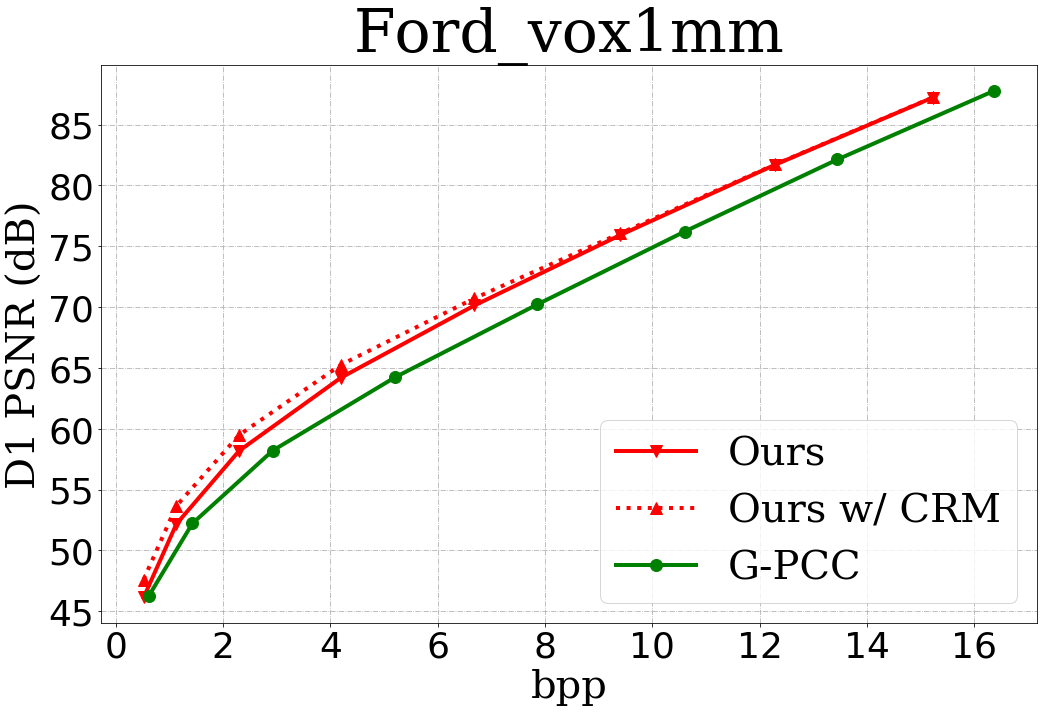

In [23]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))
# Ours
plt.plot(bpp_ours, d1_ours, label='Ours',color='red',marker='v', 
         linewidth=4,markersize=12)

# Offset
plt.plot(bpp_offset, d1_offset, label='Ours w/ CRM',color='red',marker='^', 
         linestyle=':',linewidth=4,markersize=12)

# G-PCC
plt.plot(bpp_gpcc, d1_gpcc, label='G-PCC', color='green',marker='o', 
         linewidth=4,markersize=12)

ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)
plt.tick_params(labelsize=36)
plt.xlabel("bpp", fontdict={'family':'serif', 'weight':'normal','size':40})
plt.ylabel("D1 PSNR (dB)", fontdict={'family':'serif', 'weight':'normal','size':40})

plt.title('Ford_vox1mm', fontdict={'family':'serif', 'weight':'normal','size':60})
plt.grid(ls='-.')
plt.legend(loc='lower right', ncol=1,
           prop={'family':'serif', 'weight':'normal','size':40})
fig.tight_layout()
os.makedirs('figs', exist_ok=True)
fig.savefig(os.path.join('figs', 'ford_d1.pdf'))

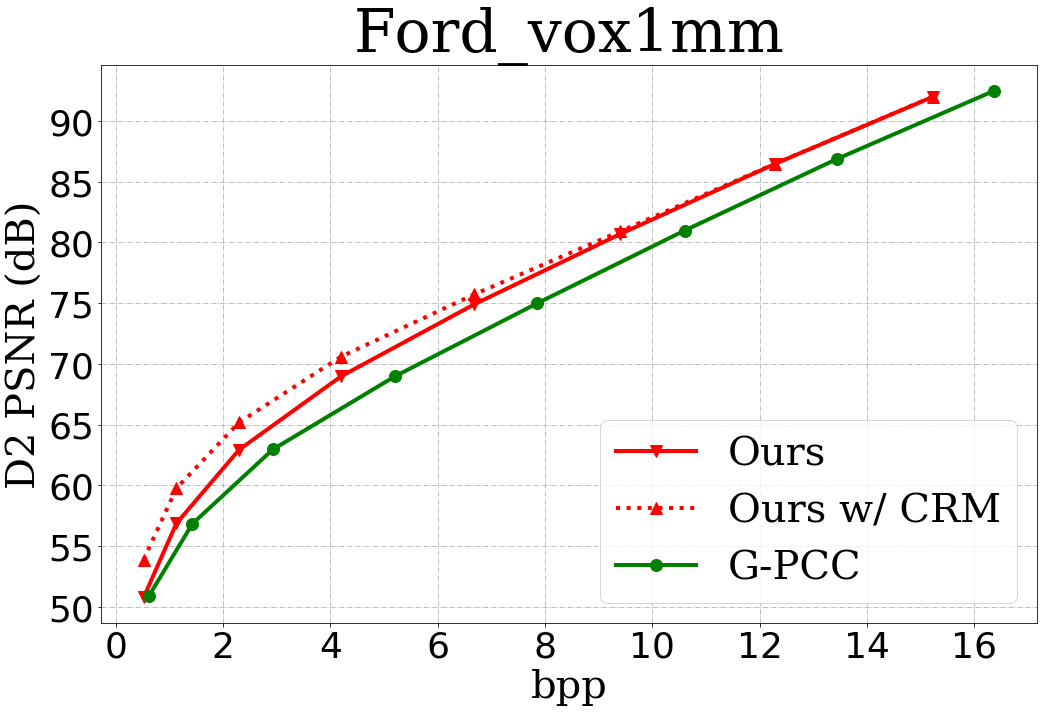

In [24]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))
# Ours
plt.plot(bpp_ours, d2_ours, label='Ours',color='red',marker='v', 
         linewidth=4,markersize=12)

# Offset
plt.plot(bpp_offset, d2_offset, label='Ours w/ CRM',color='red',marker='^', 
         linestyle=':',linewidth=4,markersize=12)

# G-PCC
plt.plot(bpp_gpcc, d2_gpcc, label='G-PCC', color='green',marker='o', 
         linewidth=4,markersize=12)

ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)
plt.tick_params(labelsize=36)
plt.xlabel("bpp", fontdict={'family':'serif', 'weight':'normal','size':40})
plt.ylabel("D2 PSNR (dB)", fontdict={'family':'serif', 'weight':'normal','size':40})

plt.title('Ford_vox1mm', fontdict={'family':'serif', 'weight':'normal','size':60})
plt.grid(ls='-.')
plt.legend(loc='lower right', ncol=1,
           prop={'family':'serif', 'weight':'normal','size':40})
fig.tight_layout()
os.makedirs('figs', exist_ok=True)
fig.savefig(os.path.join('figs', 'ford_d2.pdf'))